In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time
seconds = time.time()

The function generates a directory titled "feature_pics" within the program's directory.

In [3]:
def folder(f_name):
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [4]:
csv_files=os.listdir("attacks")

In [5]:
main_labels=["Flow Duration","Total Fwd Packets",   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min",
    "Idle Mean","Idle Std","Idle Max", "Idle Min","Label"]


COMPUTING PRIORITY FEATURES


NORMAL - 1
ATTACK - 0

Bot priority list:
Bot 
                              priority
Features                             
Bwd Packet Length Mean       0.347075
Flow IAT Max                 0.011799
Flow Duration                0.006500
Flow IAT Min                 0.004379
Flow Bytes/s                 0.002506
Flow IAT Std                 0.002084
Flow IAT Mean                0.001885
Flow Packets/s               0.000688
Fwd Packet Length Mean       0.000518
Fwd Packet Length Min        0.000262
Bwd Packet Length Max        0.000156
Bwd Packet Length Std        0.000113
Total Length of Bwd Packets  0.000089
Total Backward Packets       0.000085
Fwd IAT Total                0.000075
Total Fwd Packets            0.000060
Total Length of Fwd Packets  0.000058
Fwd Packet Length Max        0.000056
Fwd Packet Length Std        0.000029
Bwd Packet Length Min        0.000011 



Bot=["Bwd Packet Length Mean","Flow IAT Max","Flow Duration","Flow IAT Min","Flow Bytes/s"]


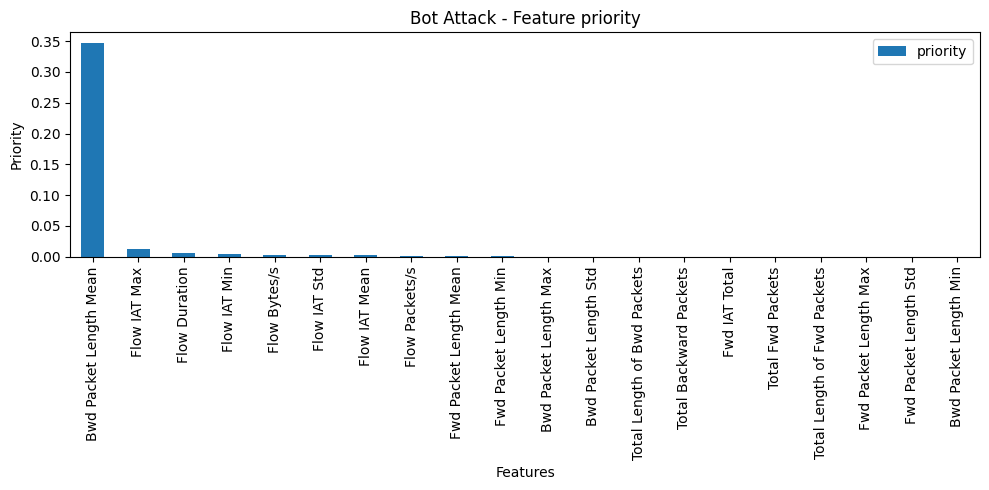

DDoS priority list:
DDoS 
                              priority
Features                             
Bwd Packet Length Std        0.469944
Total Backward Packets       0.091056
Fwd IAT Total                0.011845
Total Length of Fwd Packets  0.007150
Flow Duration                0.006624
Flow IAT Min                 0.005906
Flow IAT Mean                0.005617
Flow IAT Std                 0.005610
Flow IAT Max                 0.004759
Flow Bytes/s                 0.003425
Fwd Packet Length Max        0.002652
Flow Packets/s               0.001014
Bwd Packet Length Max        0.000611
Bwd Packet Length Min        0.000492
Fwd Packet Length Std        0.000342
Fwd Packet Length Mean       0.000330
Bwd Packet Length Mean       0.000198
Total Length of Bwd Packets  0.000100
Total Fwd Packets            0.000040
Fwd Packet Length Min        0.000031 



DDoS=["Bwd Packet Length Std","Total Backward Packets","Fwd IAT Total","Total Length of Fwd Packets","Flow Duration"]


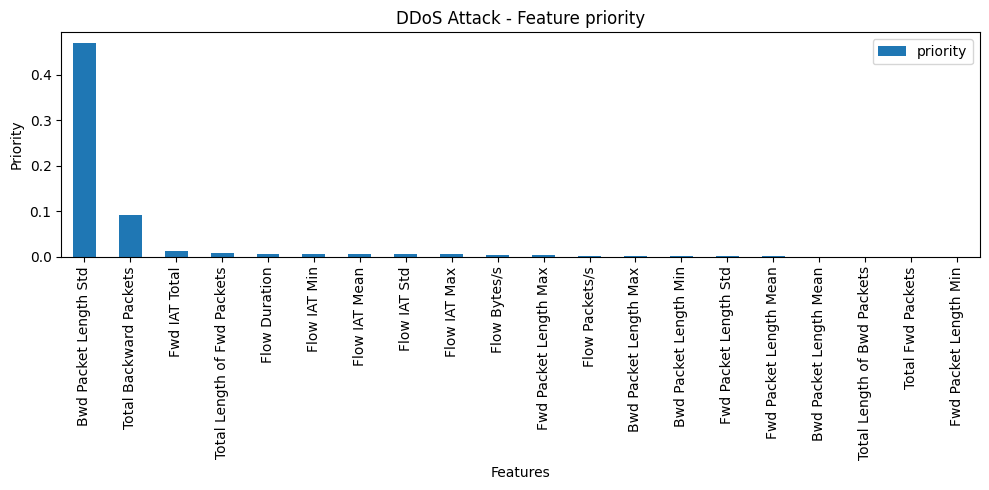

DoS GoldenEye priority list:
DoS GoldenEye 
                              priority
Features                             
Flow IAT Max                 0.305674
Bwd Packet Length Std        0.222493
Flow IAT Min                 0.125154
Total Backward Packets       0.019717
Flow IAT Mean                0.010336
Flow IAT Std                 0.009294
Fwd Packet Length Max        0.001310
Flow Duration                0.001059
Bwd Packet Length Mean       0.001044
Fwd IAT Total                0.000785
Fwd Packet Length Min        0.000727
Total Length of Fwd Packets  0.000667
Fwd Packet Length Mean       0.000482
Flow Bytes/s                 0.000408
Bwd Packet Length Max        0.000264
Flow Packets/s               0.000187
Total Length of Bwd Packets  0.000128
Fwd Packet Length Std        0.000106
Bwd Packet Length Min        0.000027
Total Fwd Packets            0.000026 



DoS GoldenEye=["Flow IAT Max","Bwd Packet Length Std","Flow IAT Min","Total Backward Packets","Flow IAT Mean"]


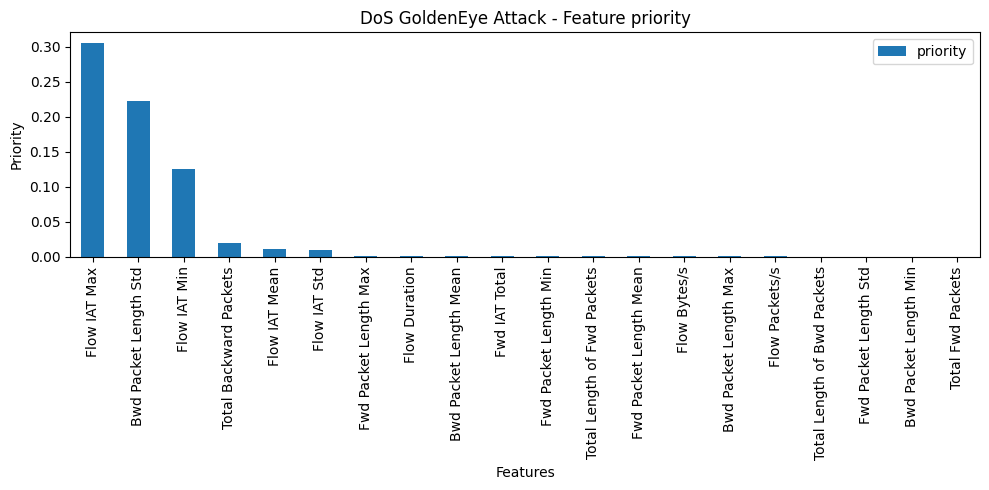

DoS Hulk priority list:
DoS Hulk 
                                  priority
Features                                 
Bwd Packet Length Std        5.143249e-01
Fwd Packet Length Std        7.744420e-02
Flow Duration                1.896212e-03
Flow IAT Min                 1.884523e-03
Fwd Packet Length Max        9.151461e-04
Total Backward Packets       3.592847e-04
Flow IAT Max                 1.983224e-04
Fwd IAT Total                1.863926e-04
Total Length of Bwd Packets  1.828012e-04
Flow IAT Std                 9.947540e-05
Flow IAT Mean                7.391927e-05
Flow Packets/s               6.896674e-05
Bwd Packet Length Mean       4.836880e-05
Flow Bytes/s                 1.943049e-05
Bwd Packet Length Max        1.334387e-05
Total Fwd Packets            1.327694e-05
Fwd Packet Length Mean       1.065368e-05
Bwd Packet Length Min        7.705478e-06
Total Length of Fwd Packets  3.985739e-06
Fwd Packet Length Min        1.291200e-07 



DoS Hulk=["Bwd Packet Length Std","Fw

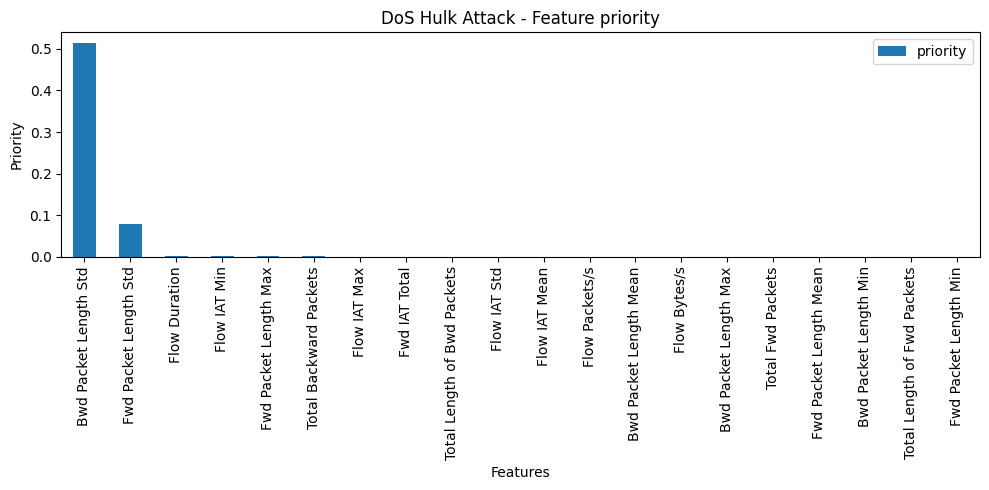

DoS Slowhttptest priority list:
DoS Slowhttptest 
                              priority
Features                             
Flow IAT Mean                0.644902
Fwd Packet Length Min        0.071301
Fwd Packet Length Std        0.025317
Fwd Packet Length Mean       0.024305
Bwd Packet Length Mean       0.022234
Total Length of Bwd Packets  0.006214
Bwd Packet Length Std        0.005086
Fwd Packet Length Max        0.002553
Bwd Packet Length Max        0.001959
Flow IAT Min                 0.001920
Total Length of Fwd Packets  0.001705
Bwd Packet Length Min        0.001190
Flow Duration                0.000567
Flow Bytes/s                 0.000488
Fwd IAT Total                0.000461
Flow IAT Max                 0.000313
Total Backward Packets       0.000190
Flow IAT Std                 0.000186
Total Fwd Packets            0.000095
Flow Packets/s               0.000093 



DoS Slowhttptest=["Flow IAT Mean","Fwd Packet Length Min","Fwd Packet Length Std","Fwd Packet Length Mean","B

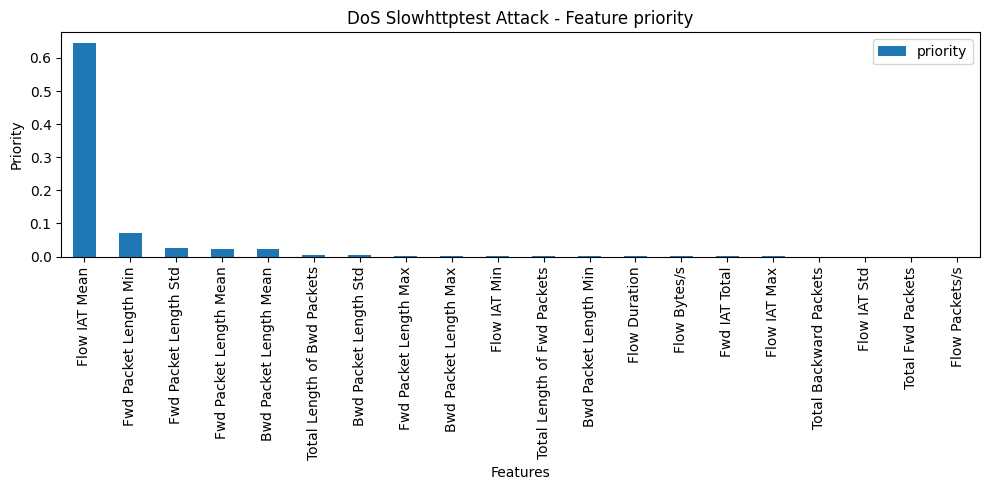

DoS slowloris priority list:
DoS slowloris 
                              priority
Features                             
Flow IAT Mean                0.469813
Bwd Packet Length Mean       0.097511
Total Fwd Packets            0.020450
Total Length of Bwd Packets  0.009591
Fwd IAT Total                0.002353
Flow IAT Min                 0.001473
Flow IAT Max                 0.000855
Fwd Packet Length Std        0.000846
Bwd Packet Length Max        0.000817
Bwd Packet Length Std        0.000733
Flow IAT Std                 0.000609
Fwd Packet Length Max        0.000465
Flow Packets/s               0.000434
Flow Duration                0.000415
Total Backward Packets       0.000400
Flow Bytes/s                 0.000394
Fwd Packet Length Mean       0.000347
Total Length of Fwd Packets  0.000275
Fwd Packet Length Min        0.000057
Bwd Packet Length Min        0.000047 



DoS slowloris=["Flow IAT Mean","Bwd Packet Length Mean","Total Fwd Packets","Total Length of Bwd Packets","Fwd IAT 

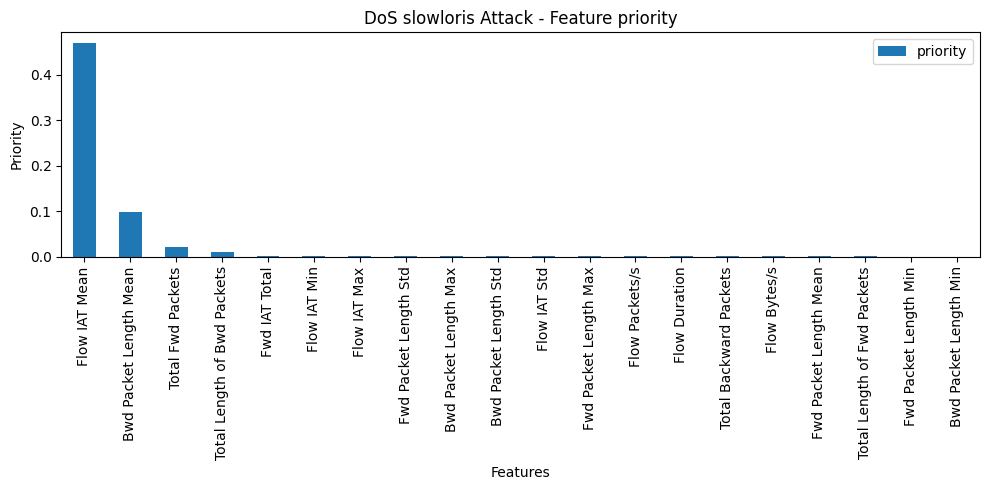

FTP-Patator priority list:
FTP-Patator 
                              priority
Features                             
Fwd Packet Length Max        0.098522
Fwd Packet Length Std        0.025424
Bwd Packet Length Mean       0.000605
Total Length of Bwd Packets  0.000585
Flow IAT Min                 0.000289
Bwd Packet Length Std        0.000149
Bwd Packet Length Max        0.000139
Total Length of Fwd Packets  0.000128
Total Fwd Packets            0.000117
Flow IAT Mean                0.000115
Flow Duration                0.000087
Flow Packets/s               0.000076
Fwd IAT Total                0.000069
Flow IAT Std                 0.000061
Flow IAT Max                 0.000047
Total Backward Packets       0.000045
Fwd Packet Length Mean       0.000023
Fwd Packet Length Min        0.000017
Flow Bytes/s                 0.000003
Bwd Packet Length Min        0.000000 



FTP-Patator=["Fwd Packet Length Max","Fwd Packet Length Std","Bwd Packet Length Mean","Total Length of Bwd Packets","Fl

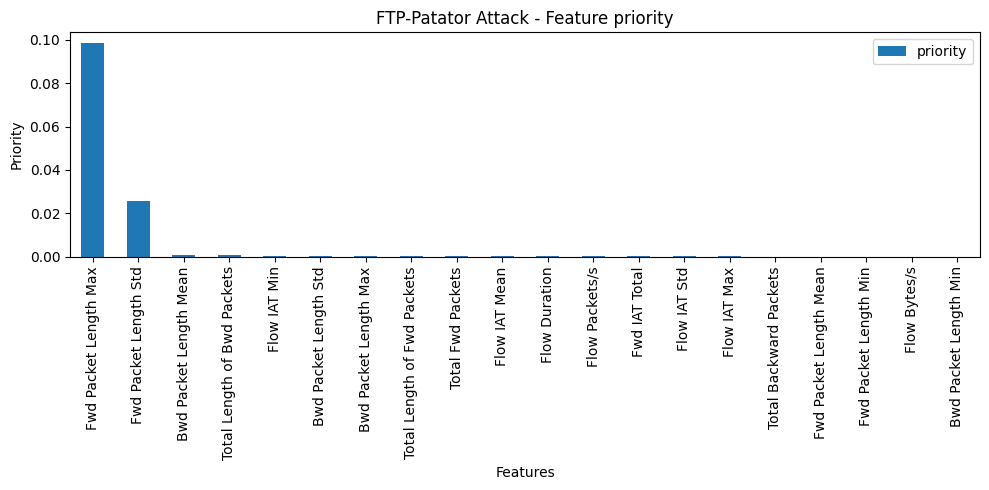

Heartbleed priority list:
Heartbleed 
                              priority
Features                             
Bwd Packet Length Mean          0.064
Bwd Packet Length Max           0.052
Total Backward Packets          0.048
Total Length of Bwd Packets     0.048
Total Fwd Packets               0.044
Fwd IAT Total                   0.020
Total Length of Fwd Packets     0.016
Flow IAT Min                    0.008
Bwd Packet Length Std           0.008
Flow Duration                   0.008
Fwd Packet Length Max           0.004
Fwd Packet Length Std           0.000
Fwd Packet Length Mean          0.000
Fwd Packet Length Min           0.000
Flow Bytes/s                    0.000
Flow Packets/s                  0.000
Flow IAT Mean                   0.000
Flow IAT Std                    0.000
Flow IAT Max                    0.000
Bwd Packet Length Min           0.000 



Heartbleed=["Bwd Packet Length Mean","Bwd Packet Length Max","Total Backward Packets","Total Length of Bwd Packets","Tota

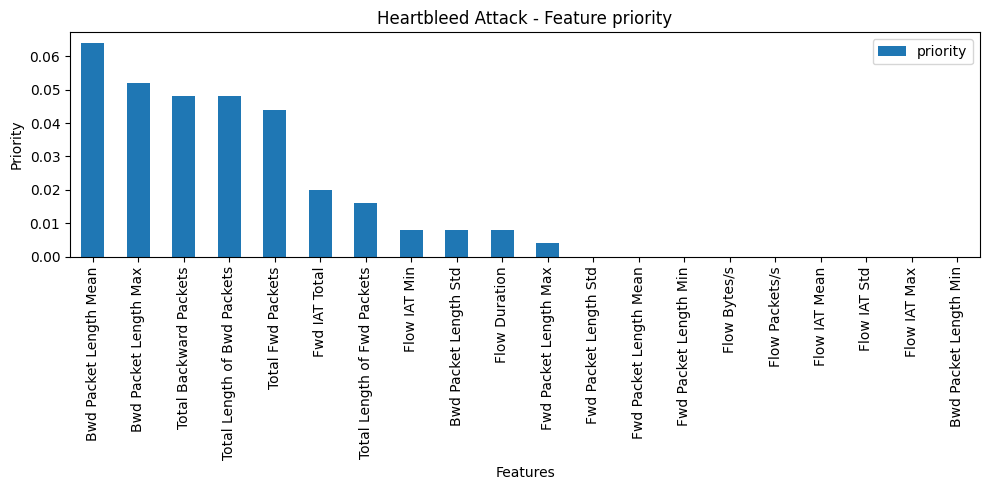

Infiltration priority list:
Infiltration 
                              priority
Features                             
Fwd Packet Length Mean       0.267610
Total Length of Fwd Packets  0.103082
Flow IAT Max                 0.020933
Flow Duration                0.020450
Fwd IAT Total                0.010179
Flow IAT Std                 0.009901
Flow IAT Min                 0.006891
Fwd Packet Length Max        0.005169
Flow IAT Mean                0.004978
Flow Packets/s               0.002203
Flow Bytes/s                 0.002137
Bwd Packet Length Std        0.002133
Total Backward Packets       0.001524
Fwd Packet Length Std        0.001286
Total Fwd Packets            0.001179
Bwd Packet Length Mean       0.001134
Bwd Packet Length Max        0.000838
Bwd Packet Length Min        0.000677
Fwd Packet Length Min        0.000613
Total Length of Bwd Packets  0.000305 



Infiltration=["Fwd Packet Length Mean","Total Length of Fwd Packets","Flow IAT Max","Flow Duration","Fwd IAT Total"]


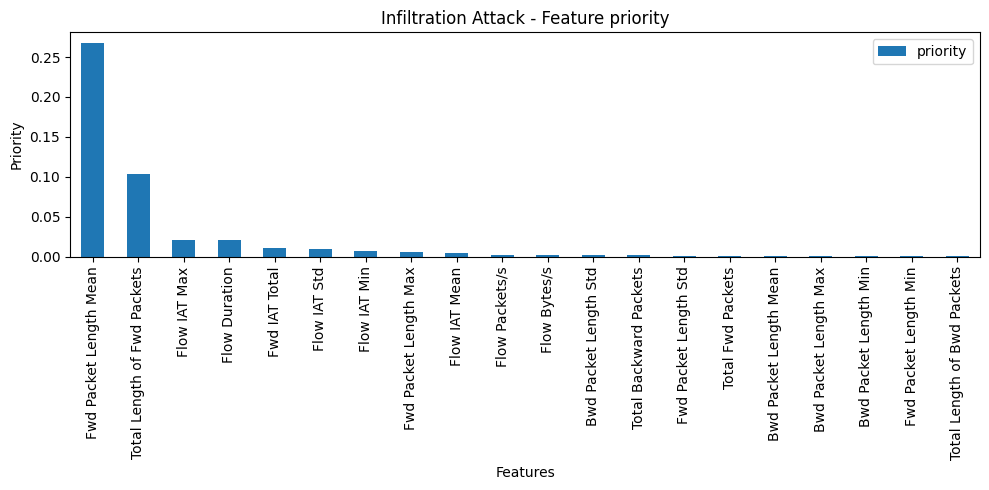

PortScan priority list:
PortScan 
                                  priority
Features                                 
Flow Bytes/s                 3.117371e-01
Total Length of Fwd Packets  3.050143e-01
Flow IAT Mean                2.570480e-04
Flow Duration                2.470398e-04
Flow IAT Max                 2.181378e-04
Fwd Packet Length Max        1.520099e-04
Fwd IAT Total                7.509508e-05
Total Length of Bwd Packets  3.943644e-05
Flow Packets/s               2.736386e-05
Flow IAT Min                 2.288386e-05
Fwd Packet Length Mean       2.272788e-05
Flow IAT Std                 2.247682e-05
Total Fwd Packets            2.121557e-05
Bwd Packet Length Std        2.072521e-05
Bwd Packet Length Min        2.070616e-05
Fwd Packet Length Std        1.658511e-05
Bwd Packet Length Max        1.393888e-05
Bwd Packet Length Mean       1.268514e-05
Total Backward Packets       1.086647e-05
Fwd Packet Length Min        4.165352e-07 



PortScan=["Flow Bytes/s","Total Lengt

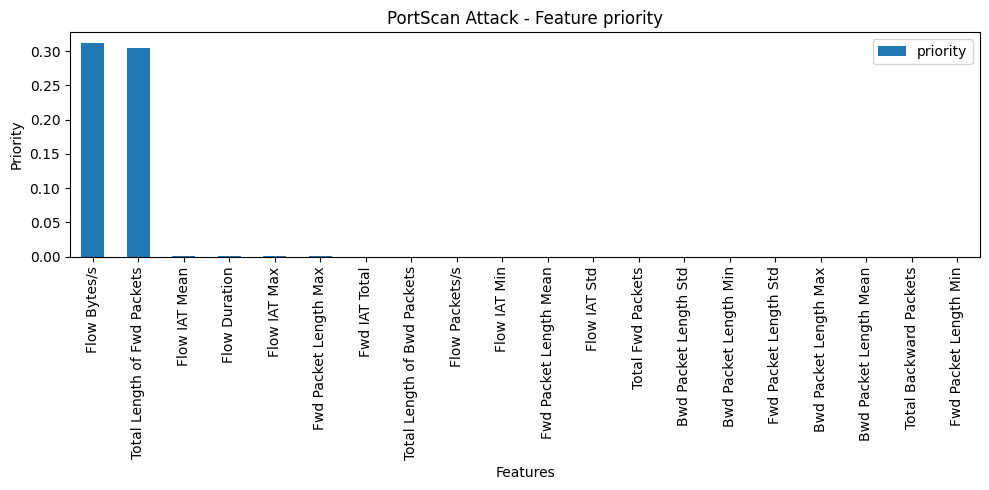

SSH-Patator priority list:
SSH-Patator 
                              priority
Features                             
Flow Bytes/s                 0.001138
Fwd Packet Length Max        0.001087
Flow IAT Mean                0.000805
Flow IAT Max                 0.000585
Flow Duration                0.000583
Flow Packets/s               0.000543
Flow IAT Std                 0.000527
Total Length of Fwd Packets  0.000380
Fwd IAT Total                0.000252
Flow IAT Min                 0.000171
Fwd Packet Length Mean       0.000160
Total Backward Packets       0.000118
Bwd Packet Length Mean       0.000094
Fwd Packet Length Std        0.000092
Bwd Packet Length Max        0.000090
Fwd Packet Length Min        0.000075
Total Length of Bwd Packets  0.000057
Bwd Packet Length Min        0.000052
Total Fwd Packets            0.000047
Bwd Packet Length Std        0.000042 



SSH-Patator=["Flow Bytes/s","Fwd Packet Length Max","Flow IAT Mean","Flow IAT Max","Flow Duration"]


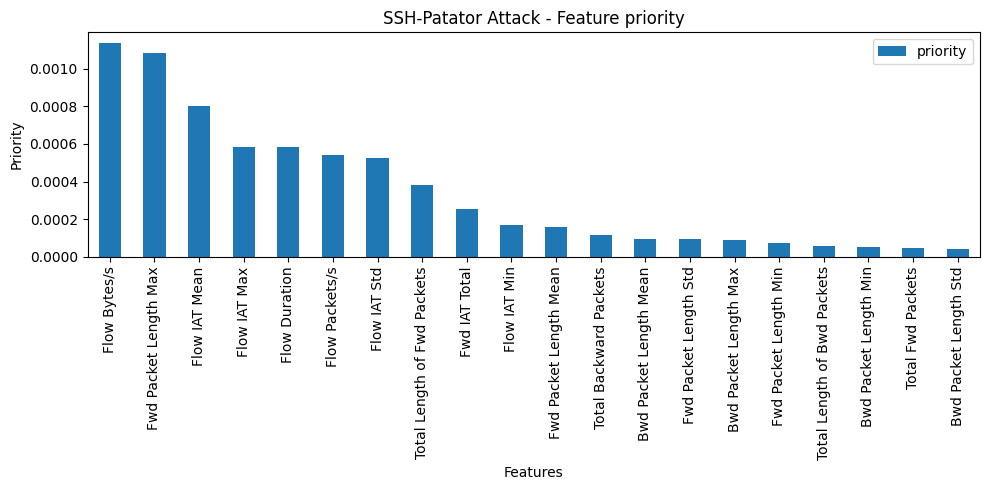

Web Attack priority list:
Web Attack 
                              priority
Features                             
Total Length of Fwd Packets  0.011634
Bwd Packet Length Std        0.008527
Fwd Packet Length Mean       0.001837
Flow Bytes/s                 0.001563
Fwd Packet Length Max        0.001419
Flow Packets/s               0.001266
Bwd Packet Length Max        0.001177
Flow IAT Max                 0.001168
Fwd Packet Length Std        0.001160
Flow IAT Mean                0.001074
Flow Duration                0.001066
Flow IAT Min                 0.000783
Fwd IAT Total                0.000739
Total Fwd Packets            0.000255
Bwd Packet Length Mean       0.000163
Total Backward Packets       0.000115
Flow IAT Std                 0.000085
Total Length of Bwd Packets  0.000036
Bwd Packet Length Min        0.000013
Fwd Packet Length Min        0.000000 



Web Attack=["Total Length of Fwd Packets","Bwd Packet Length Std","Fwd Packet Length Mean","Flow Bytes/s","Fwd Packet Len

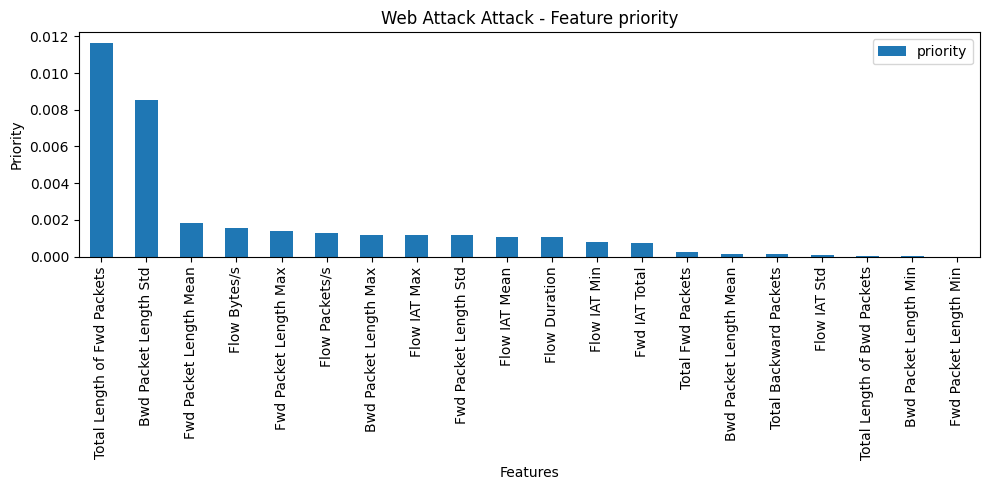

-----------------------------------------------------------------------------------------------




Total operation time: =  8843.324903011322 seconds


In [6]:
ths = open("priority_list_for_attack_files.csv", "w")
folder("./feature_pics/")
for j in csv_files:
    df=pd.read_csv(".\\attacks\\"+j,usecols=main_labels)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values
    
    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0
       
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'priority':importances[0:20]})
    impor_bars = impor_bars.sort_values('priority',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(j[0:-4],"priority list:")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4]+" Attack - Feature priority")
    plt.ylabel('Priority')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    plt.show() 
    
print("-----------------------------------------------------------------------------------------------\n\n\n\n")
print("Total operation time: = ",time.time()- seconds ,"seconds")
ths.close()